In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [268]:
data=pd.read_csv('Orange_Telecom_Churn_Data.csv')
data.head(6)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [269]:
data.drop(['phone_number'],axis=1,inplace=True)
data.head()

,state,account_length,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [270]:
data=data.rename({'account_length':'length','area_code':'code','total_night_charge':'night_charge',
             'number_customer_service_calls':'service_call','total_night_minutes':'night_min',
             'total_night_calls':'night_calls',
             'voice_mail_plan':'voice_plan','number_vmail_messages':'messages','total_day_minutes':'total_min'
             ,'total_day_calls':'total_calls','total_day_charge':'day_charge'},axis=1)
data.head()

,state,length,code,intl_plan,voice_plan,messages,total_min,total_calls,day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,night_min,night_calls,night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,service_call,churned
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [271]:
data['churned'].unique()

array([False,  True])

In [272]:
data['intl_plan']=data['intl_plan'].map({'no':0,'yes':1})
data['voice_plan']=data['voice_plan'].map({'no':0,'yes':1})


In [273]:
data.head()

,state,length,code,intl_plan,voice_plan,messages,total_min,total_calls,day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,night_min,night_calls,night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,service_call,churned
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


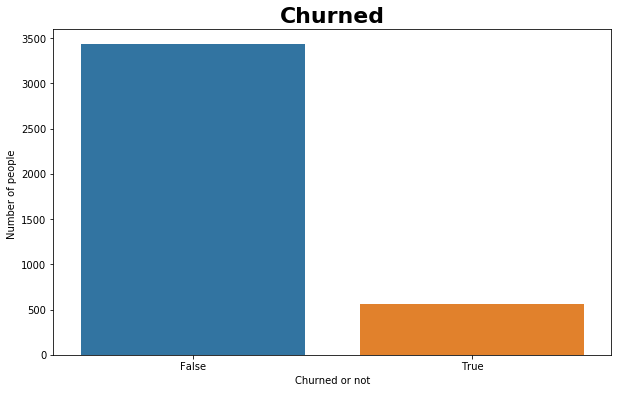

In [274]:
font = {
    'weight' : 'bold',
    'size'   : 22
}
plt.figure(figsize=(10,6))
sns.countplot(x='churned',data=data)
plt.xlabel('Churned or not')
plt.ylabel('Number of people ')
plt.title("Churned", fontdict=font)
# plt.legend(loc='best')
plt.savefig('no_of_people.png')
plt.show()

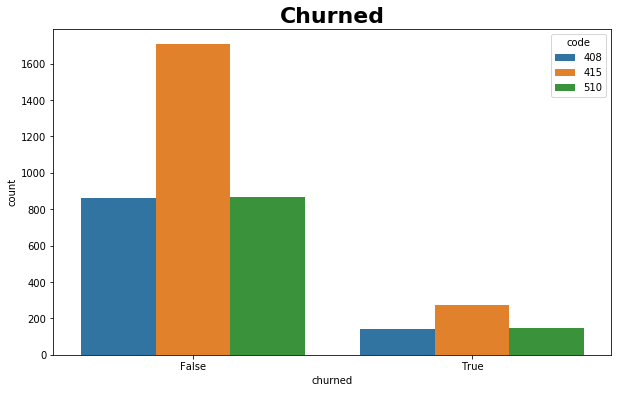

In [275]:
plt.figure(figsize=(10,6))
plt.xlabel('Churned or not')
plt.ylabel('Number of people ')
plt.title("Churned", fontdict=font)
# plt.legend(loc='best')
sns.countplot(x='churned',hue='code',data=data)
plt.savefig('Area_code.png')
plt.show()


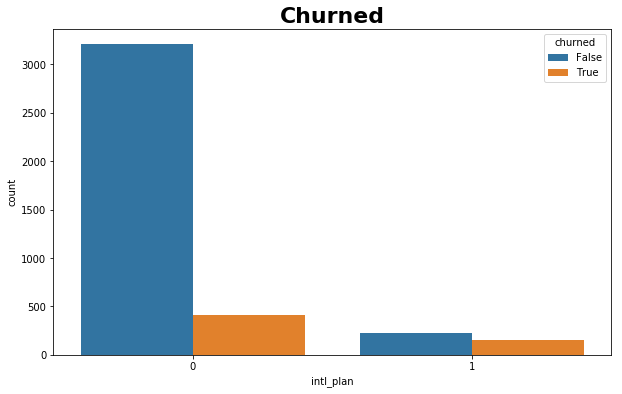

In [276]:
plt.figure(figsize=(10,6))
plt.xlabel('Churned or not')
plt.ylabel('Number of people ')
plt.title("Churned", fontdict=font)
sns.countplot(x='intl_plan',hue='churned',data=data)
plt.savefig('effect_of_intl_plan.png')

In [277]:
data.corr()

,length,code,intl_plan,voice_plan,messages,total_min,total_calls,day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,night_min,night_calls,night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,service_call,churned
length,1.000000,-0.016264,0.020282,-0.000682,-0.009088,0.002778,0.031772,0.002775,-0.016144,0.011994,-0.016131,-0.006440,-0.010764,-0.006445,0.005647,0.027537,0.005664,-0.011703,0.018544
code,-0.016264,1.000000,0.047106,-0.002308,-0.001130,-0.013009,-0.014372,-0.013011,0.008746,-0.011571,0.008773,-0.000875,0.012193,-0.000884,-0.015246,-0.008948,-0.015353,0.021688,0.004044
intl_plan,0.020282,0.047106,1.000000,0.011673,0.014571,0.038719,0.009019,0.038720,0.028090,0.002267,0.028095,-0.026678,0.013766,-0.026687,0.044663,0.014659,0.044600,-0.022568,0.242744
voice_plan,-0.000682,-0.002308,0.011673,1.000000,0.954678,0.005134,-0.001293,0.005131,0.025595,-0.001853,0.025604,0.003369,0.015370,0.003356,0.006869,0.003564,0.006904,-0.012699,-0.107855
messages,-0.009088,-0.001130,0.014571,0.954678,1.000000,0.008909,0.001826,0.008903,0.021734,-0.002165,0.021744,0.001913,0.006211,0.001896,0.007810,0.009549,0.007837,-0.008699,-0.093531
total_min,0.002778,-0.013009,0.038719,0.005134,0.008909,1.000000,0.000917,1.000000,-0.009586,0.013071,-0.009591,0.014697,0.020414,0.014674,-0.005885,0.001765,-0.005841,-0.010134,0.209813
total_calls,0.031772,-0.014372,0.009019,-0.001293,0.001826,0.000917,1.000000,0.000917,-0.014198,0.006675,-0.014199,0.010102,-0.015650,0.010098,0.014712,0.004897,0.014831,-0.020170,0.014576
day_charge,0.002775,-0.013011,0.038720,0.005131,0.008903,1.000000,0.000917,1.000000,-0.009579,0.013071,-0.009584,0.014699,0.020413,0.014676,-0.005886,0.001761,-0.005842,-0.010140,0.209812
total_eve_minutes,-0.016144,0.008746,0.028090,0.025595,0.021734,-0.009586,-0.014198,-0.009579,1.000000,-0.011675,1.000000,-0.017369,0.011518,-0.017377,-0.004806,-0.000102,-0.004784,-0.018963,0.084792
total_eve_calls,0.011994,-0.011571,0.002267,-0.001853,-0.002165,0.013071,0.006675,0.013071,-0.011675,1.000000,-0.011663,-0.008459,-0.001266,-0.008431,-0.005592,0.004491,-0.005617,0.008215,-0.000118


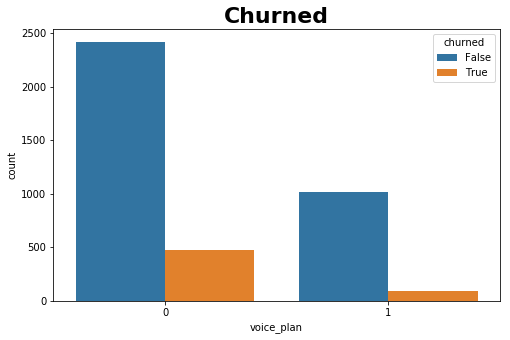

In [278]:
plt.figure(figsize=(8,5))
plt.xlabel('Churned or not')
plt.ylabel('Number of people ')
plt.title("Churned", fontdict=font)
sns.countplot(x='voice_plan',hue='churned',data=data)
plt.savefig('effect_of_voice_plan.png')

In [279]:
data.columns

Index(['state', 'length', 'code', 'intl_plan', 'voice_plan', 'messages',
       'total_min', 'total_calls', 'day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'night_min', 'night_calls',
       'night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'service_call', 'churned'],
      dtype='object')

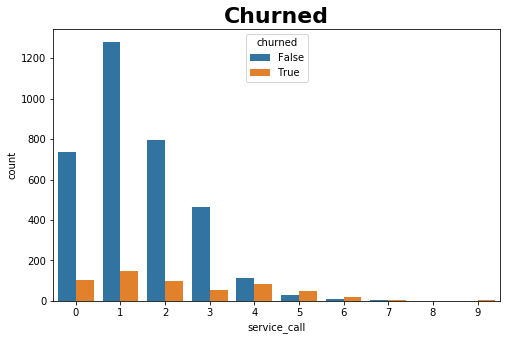

In [280]:
plt.figure(figsize=(8,5))
plt.xlabel('Churned or not')
plt.ylabel('Number of people ')
plt.title("Churned", fontdict=font)
sns.countplot(x='service_call',hue='churned',data=data)
plt.savefig('effect_of_no_of_service_call.png')

In [281]:
data.drop(['state','code','total_eve_minutes','night_calls','length','total_calls','total_eve_calls'],axis=1,inplace=True)

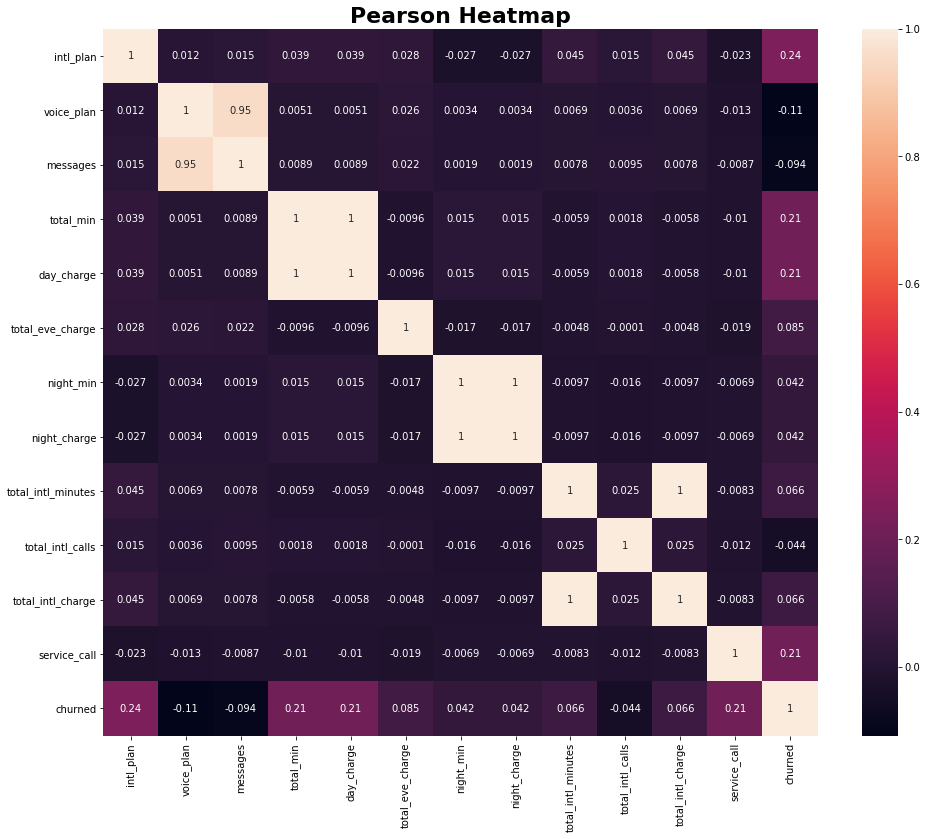

In [282]:
plt.figure(figsize=(16,13))

plt.title("Pearson Heatmap", fontdict=font)
sns.heatmap(data.corr(),annot=True)

In [283]:
data.isnull().any()

intl_plan             False
voice_plan            False
messages              False
total_min             False
day_charge            False
total_eve_charge      False
night_min             False
night_charge          False
total_intl_minutes    False
total_intl_calls      False
total_intl_charge     False
service_call          False
churned               False
dtype: bool

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
intl_plan             4000 non-null int64
voice_plan            4000 non-null int64
messages              4000 non-null int64
total_min             4000 non-null float64
day_charge            4000 non-null float64
total_eve_charge      4000 non-null float64
night_min             4000 non-null float64
night_charge          4000 non-null float64
total_intl_minutes    4000 non-null float64
total_intl_calls      4000 non-null int64
total_intl_charge     4000 non-null float64
service_call          4000 non-null int64
churned               4000 non-null bool
dtypes: bool(1), float64(7), int64(5)
memory usage: 379.0 KB


In [285]:
X,Y=data.drop(['churned'],axis=1),data.churned

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Using Decision Tree

In [286]:
model1=DecisionTreeClassifier()

In [287]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [288]:
prediction1=model1.predict(x_test)

In [289]:
print(round(accuracy_score(prediction1,y_test)*100,2))

92.35


# Using KNN

In [290]:
model2=KNeighborsClassifier(n_neighbors=10)
model2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [291]:
prediction2=model2.predict(x_test)

print(round(accuracy_score(prediction2,y_test)*100,2))

88.86


# Using Logistic Regression

In [292]:
model3=LogisticRegression()
model3.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [293]:
prediction3=model3.predict(x_test)

print(round(accuracy_score(prediction3,y_test)*100,2))

86.29
